In [22]:
import pandas as pd
import numpy as np

df1 = pd.read_excel('평균매매가격_종합.xlsx')
df2 = df1.iloc[9:]
df3 = df2.rename(columns = df2.iloc[0]) # 열 이름 변경
df4 = df3.iloc[1:]
df5 = df4.reset_index() # index 재설정
df6 = df5.iloc[:, 1:]
df7 = df6[df6['지 역'].notna()] # NaN값 제외
df8 = df7.reset_index()
df9 = df8.iloc[:, 1:]
df10 = df9.drop(df9.columns[1:27], axis = 1) # 불필요한 열 제외
df11 = df10.T # 행/열 변경
df12 = df11.rename(columns = df11.iloc[0])
df13 = df12.iloc[1:121]
idx_val = df13.index.values

for i in range(len(idx_val)) : # index 값 통합
    if i < 12 :
        idx_val[i] = 2014
        
    elif i < 24 :
        idx_val[i] = 2015
        
    elif i < 36 :
        idx_val[i] = 2016
        
    elif i < 48 :
        idx_val[i] = 2017
        
    elif i < 60 :
        idx_val[i] = 2018
        
    elif i < 72 :
        idx_val[i] = 2019
        
    elif i < 84 :
        idx_val[i] = 2020
        
    elif i < 96 :
        idx_val[i] = 2021
        
    elif i < 108 :
        idx_val[i] = 2022
        
    elif i < 120 :
        idx_val[i] = 2023
        
df13.index = idx_val
df13.index.name = '연도별 종합주택유형 매매가 평균(단위 : 천원)'
df14 = df13.groupby('연도별 종합주택유형 매매가 평균(단위 : 천원)').mean() # 연도별 평균 계산
df14.loc[:, '전국' : '제주'] = df14.loc[:,'전국' : '제주'].astype(int) # data type 변경(float -> int32)
df15 = df14.drop(df14.columns[1:7], axis = 1)
# df15.to_excel('종합주택유형_평균매매가격.xlsx') # Excel File로 저장
df15

,전국,서울,경기,인천,부산,대구,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주
연도별 종합주택유형 매매가 평균(단위 : 천원),,,,,,,,,,,,,,,,,,
2014,232746,445022,260287,189538,190090,188890,138741,192209,209553,160109,116631,135233,138308,104832,84287,123166,163420,140588
2015,239050,454295,263318,193661,196434,214495,155250,200736,224124,176995,121708,137684,136313,110126,88516,127071,171038,164647
2016,246889,468677,270389,196058,204957,231217,170748,209879,238508,198060,127557,136586,131961,115889,93272,126780,175817,207546
2017,253285,484823,276020,200360,216682,235100,174749,214789,240368,225823,131069,137037,131291,119274,96824,125778,175557,238004
2018,285257,576621,300697,214859,247442,266624,209404,224571,249331,288625,146120,145196,137058,141598,108254,130241,176949,274980
2019,306444,647371,319955,226395,246349,286268,235684,250136,242629,324877,151446,146481,148360,143759,120461,132121,175894,311670
2020,329854,693632,357853,257562,261897,301799,239360,296794,255253,431001,153527,150998,153323,146834,123512,133795,178287,301526
2021,386716,792630,452987,310502,325451,355614,263080,343400,301135,588182,161072,175935,180441,152953,130960,145713,200662,291255
2022,421744,873719,511498,338861,361008,366910,282512,350228,317406,615167,166447,194422,198365,156230,136198,152931,217403,284841


In [23]:
df16 = df15.iloc[:, 1:4] # 수도권(서울, 경기, 인천) 데이터
df16 = pd.DataFrame(np.round(df16.mean(axis = 1))) # 연도별 수도권 데이터 평균
df16.columns = ['수도권']
df16 = df16.astype(int)
df16 = df16.T
df16

연도별 종합주택유형 매매가 평균(단위 : 천원),2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
수도권,298282,303758,311708,320401,364059,397907,436349,518706,574693,519172


In [24]:
df17 = df15.iloc[:, 4:] # 비수도권 데이터
df17 = pd.DataFrame(np.round(df17.mean(axis = 1))) # 연도별 비수도권 데이터 평균
df17.columns = ['비수도권']
df17 = df17.astype(int)
df17 = df17.T
df17

연도별 종합주택유형 매매가 평균(단위 : 천원),2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
비수도권,149004,158938,169198,175882,196171,208295,223422,258275,271433,247869


In [25]:
df18 = pd.concat([df16, df17]) # DataFrame 결합
df18 = df18.T
df18

,수도권,비수도권
연도별 종합주택유형 매매가 평균(단위 : 천원),,
2014,298282,149004
2015,303758,158938
2016,311708,169198
2017,320401,175882
2018,364059,196171
2019,397907,208295
2020,436349,223422
2021,518706,258275
2022,574693,271433


In [5]:
# 데이터 부르기
df50=pd.read_csv('2014_2023_주민등록인구기타현황(출생등록)_연간.csv',encoding='cp949')
df50

# Cleansing & Fixing
for i in range(2014,2024):
    df50=df50.drop(columns=f'{i}년_남자인구수')
    df50=df50.drop(columns=f'{i}년_여자인구수')

df50=df50.T
df50=df50.rename(columns=df50.iloc[0]).reset_index().drop([0],axis=0).reset_index().drop('level_0',axis=1)
df50
df50=df50.rename(columns={'index':'연도'})
df50=df50.set_index(keys='연도')

for j in range(2014,2024):
    df50=df50.rename(index={f'{j}년_계':j})

# df50=df50.reset_index()
# df50=df50.astype({'연도':'int32'})
# df50=df50.astype({'전국  (1000000000)':'int32'})

df50['전국  (1000000000)']=df50['전국  (1000000000)'].str.replace(',','').astype(int)
df50

,전국 (1000000000),서울특별시 (1100000000),부산광역시 (2600000000),대구광역시 (2700000000),인천광역시 (2800000000),광주광역시 (2900000000),대전광역시 (3000000000),울산광역시 (3100000000),세종특별자치시 (3600000000),경기도 (4100000000),강원도 (4200000000),강원특별자치도 (5100000000),충청북도 (4300000000),충청남도 (4400000000),전라북도 (4500000000),전라남도 (4600000000),경상북도 (4700000000),경상남도 (4800000000),제주특별자치도 (5000000000)
연도,,,,,,,,,,,,,,,,,,,
2014,439198,"84,223","26,412","19,509","26,115","12,793","14,054","11,602","1,343","113,397","10,775",0,"13,562","18,370","14,340","14,919","22,208","30,020","5,556"
2015,444098,"84,184","26,979","19,665","25,706","12,634","13,943","11,856","2,684","115,128","11,023",0,"13,775","18,840","14,289","15,314","22,645","29,755","5,678"
2016,411859,"76,718","25,295","18,511","23,865","11,740","12,577","11,030","3,327","107,305","10,208",0,"12,906","17,487","12,913","14,167","20,829","27,448","5,533"
2017,362867,"66,282","21,796","16,185","20,804","10,281","11,006","9,562","3,502","95,547","9,127",0,"11,524","15,807","11,492","12,532","18,211","24,138","5,071"
2018,334115,"59,553","19,692","14,674","20,395","9,345","9,572","8,285","3,793","90,144","8,494",0,"10,843","14,726","10,240","11,412","16,441","21,645","4,861"
2019,308697,"54,782","17,382","13,465","18,902","8,461","8,638","7,637","3,895","85,217","8,453",0,"9,362","13,467","9,078","11,053","14,790","19,570","4,545"
2020,275815,"48,055","15,294","11,351","16,240","7,410","7,591","6,711","3,500","78,587","7,916",0,"8,748","12,123","8,318","9,859","13,045","17,053","4,014"
2021,263127,"45,999","14,545","10,721","15,122","8,040","7,464","6,169","3,592","76,946","7,417",0,"8,330","11,072","7,559","8,567","12,158","15,629","3,797"
2022,254628,"43,741","14,432","10,337","14,786","7,521","7,824","5,509","3,295","77,090","7,429",0,"7,576","10,438","7,191","8,027","11,528","14,265","3,639"


In [6]:
df51 = df50.iloc[:, [1, 4, 9]]
df51['서울특별시  (1100000000)'] = df51['서울특별시  (1100000000)'].str.replace(',','').astype(int)
df51['인천광역시  (2800000000)'] = df51['인천광역시  (2800000000)'].str.replace(',','').astype(int)
df51['경기도  (4100000000)'] = df51['경기도  (4100000000)'].str.replace(',','').astype(int)
df51 = pd.DataFrame(np.round(df51.mean(axis = 1)))
df51.columns = ['수도권']
df51 = df51.astype(int)
df51 = df51.T
df51

C:\Users\user\AppData\Local\Temp\ipykernel_16472\2736730102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df51['서울특별시  (1100000000)'] = df51['서울특별시  (1100000000)'].str.replace(',','').astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_16472\2736730102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df51['인천광역시  (2800000000)'] = df51['인천광역시  (2800000000)'].str.replace(',','').astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_16472\2736730102.py:4: SettingWithCopyWarning: 
A value is trying

연도,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
수도권,74578,75006,69296,60878,56697,52967,47627,46022,45206,41698


In [7]:
df52 = df50.iloc[:, 2:4]
df52['부산광역시  (2600000000)'] = df52['부산광역시  (2600000000)'].str.replace(',','').astype(int)
df52['대구광역시  (2700000000)'] = df52['대구광역시  (2700000000)'].str.replace(',','').astype(int)
df52 = pd.DataFrame(np.round(df52.mean(axis = 1)))
df52.columns = ['부산_대구']
df52 = df52.astype(int)
df52 = df52.T
df52

연도,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
부산_대구,22960,23322,21903,18990,17183,15424,13322,12633,12384,11378


In [8]:
df53 = df50.iloc[:, 5:9]
df53['광주광역시  (2900000000)'] = df53['광주광역시  (2900000000)'].str.replace(',','').astype(int)
df53['대전광역시  (3000000000)'] = df53['대전광역시  (3000000000)'].str.replace(',','').astype(int)
df53['울산광역시  (3100000000)'] = df53['울산광역시  (3100000000)'].str.replace(',','').astype(int)
df53['세종특별자치시  (3600000000)'] = df53['세종특별자치시  (3600000000)'].str.replace(',','').astype(int)
df53 = pd.DataFrame(np.round(df53.mean(axis = 1)))
df53.columns = ['광역시']
df53 = df53.astype(int)
df53 = df53.T
df53

연도,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
광역시,9948,10279,9668,8588,7749,7158,6303,6316,6037,5372


In [9]:
df54 = df50.iloc[:, 10]
df54 = pd.DataFrame(df54)
df54['강원도  (4200000000)'] = df54['강원도  (4200000000)'].str.replace(',','').astype(int)
df54.columns = ['강원도']
df54 = df54.T
df54

연도,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
강원도,10775,11023,10208,9127,8494,8453,7916,7417,7429,3030


In [10]:
df55 = df50.iloc[:, 12:19]
df55['충청북도  (4300000000)'] = df55['충청북도  (4300000000)'].str.replace(',','').astype(int)
df55['충청남도  (4400000000)'] = df55['충청남도  (4400000000)'].str.replace(',','').astype(int)
df55['전라북도  (4500000000)'] = df55['전라북도  (4500000000)'].str.replace(',','').astype(int)
df55['전라남도  (4600000000)'] = df55['전라남도  (4600000000)'].str.replace(',','').astype(int)
df55['경상북도  (4700000000)'] = df55['경상북도  (4700000000)'].str.replace(',','').astype(int)
df55['경상남도  (4800000000)'] = df55['경상남도  (4800000000)'].str.replace(',','').astype(int)
df55['제주특별자치도  (5000000000)'] = df55['제주특별자치도  (5000000000)'].str.replace(',','').astype(int)
df55 = pd.DataFrame(np.round(df55.mean(axis = 1)))
df55.columns = ['수도권 이남']
df55 = df55.astype(int)
df55 = df55.T
df55

연도,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
수도권 이남,16996,17185,15898,14111,12881,11695,10451,9587,8952,8414


In [11]:
df56 = pd.concat([df52, df53, df54, df55])
df56 = pd.DataFrame(np.round(df56.mean()))
df56.columns = ['비수도권']
df56 = df56.astype(int)
df56 = df56.T
df56

연도,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
비수도권,15170,15452,14419,12704,11577,10682,9498,8988,8700,7048


In [12]:
df57 = pd.concat([df51, df56])
df57 = df57.T
df57

,수도권,비수도권
연도,,
2014,74578,15170
2015,75006,15452
2016,69296,14419
2017,60878,12704
2018,56697,11577
2019,52967,10682
2020,47627,9498
2021,46022,8988
2022,45206,8700


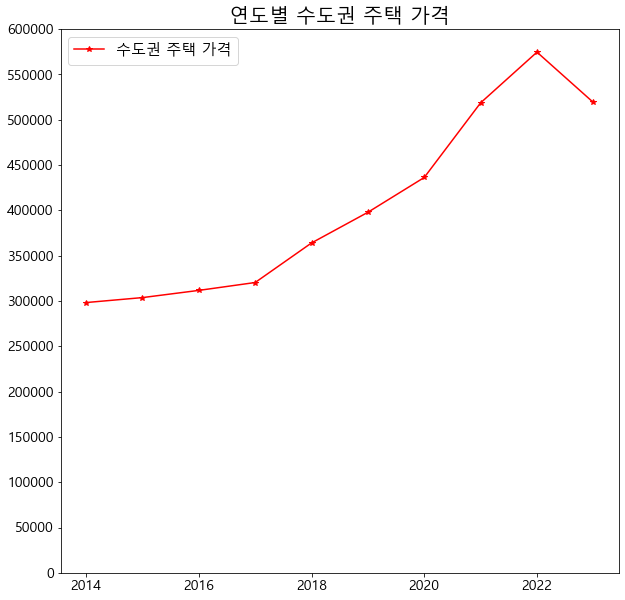

In [32]:
from matplotlib import pyplot as plt

# 한글 Font 설정
plt.rc('font', family = 'Malgun Gothic', size = '14')

fig = plt.figure(figsize = (10, 10))
axes = fig.add_subplot(111)

axes.plot(df57.index, df57['수도권'].values, color = 'blue', marker = '*', label = '수도권 출산')
axes.plot(df18.index, df18['수도권'].values, color = 'red', marker = '*', label = '수도권 주택 가격')

plt.title('연도별 수도권 주택 가격', fontsize = 20)
plt.yticks(np.arange(0, 600001, 50000))
plt.legend(fontsize = 15)
plt.savefig('연도별 수도권 주택 가격.png')
plt.show()

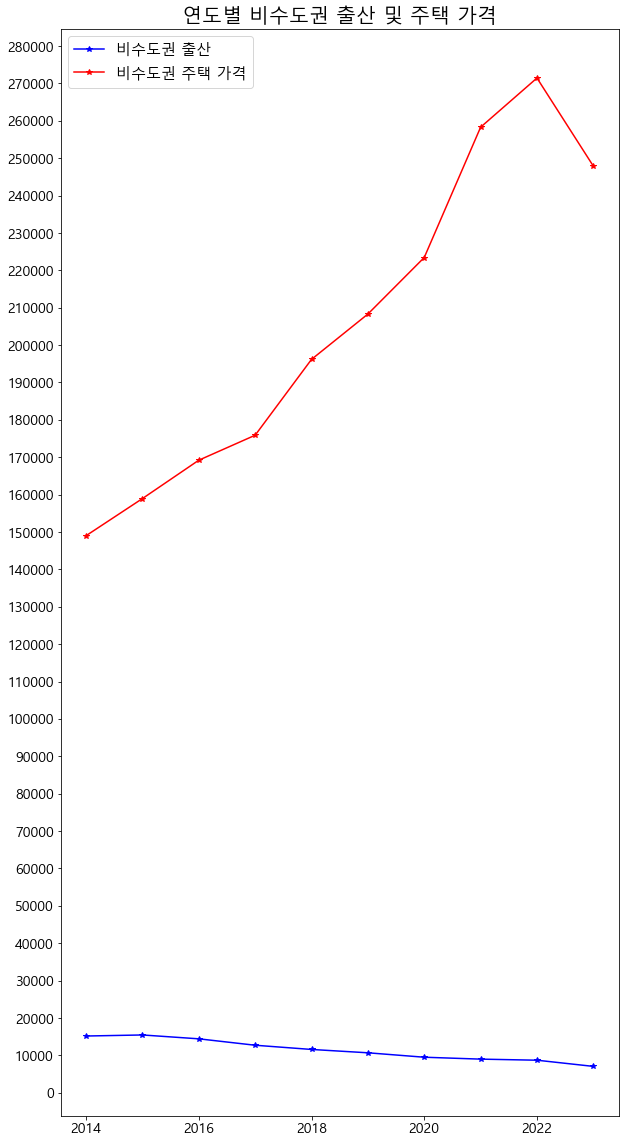

In [16]:
# 한글 Font 설정
plt.rc('font', family = 'Malgun Gothic', size = '14')

fig = plt.figure(figsize = (10, 20))
axes = fig.add_subplot(111)

axes.plot(df57.index, df57['비수도권'].values, color = 'blue', marker = '*', label = '비수도권 출산')
axes.plot(df18.index, df18['비수도권'].values, color = 'red', marker = '*', label = '비수도권 주택 가격')

plt.title('연도별 비수도권 출산 및 주택 가격', fontsize = 20)
plt.yticks(np.arange(0, 280001, 10000))
plt.legend(fontsize = 15)
plt.show()

공분산: -74413.27
상관계수: -0.92
P-value: 0.0002
                            OLS Regression Results                            
Dep. Variable:               bir_rate   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     44.25
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           0.000160
Time:                        09:20:04   Log-Likelihood:                -24.852
No. Observations:                  10   AIC:                             53.70
Df Residuals:                       8   BIC:                             54.31
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


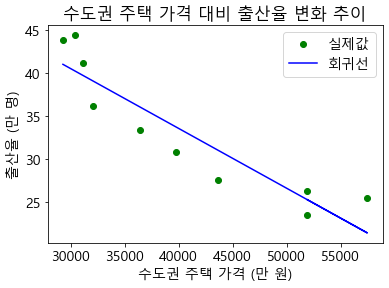

In [21]:
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

# 한글 Font 설정
plt.rc('font', family = 'Malgun Gothic', size = '14')

data2 = {
    'pri_house_metro': [29298, 30376, 31171, 32040, 36406, 39791, 43635, 51871, 57469, 51917],  # 주택 가격 (단위: 만원)
    'bir_rate': [43.9, 44.4, 41.2, 36.2, 33.4, 30.8, 27.6, 26.3, 25.5, 23.5]   # 출생율 (단위: 만명)
}

df2 = pd.DataFrame(data2)

x= df2['pri_house_metro']
y = df2['bir_rate']

# 상관계수, 공분산 - 두 변수 상관 정도 + p-value
print('공분산: {:.2f}'.format(np.cov(x,y)[0,1])) 
print('상관계수: {:.2f}'.format(stats.pearsonr(x,y)[0]))

# -1 < (상관계수) < 1 
# => 1에 가까울 수록 강한 양의 상관관계
# => -1에 가까울 수록 강한 음의 상관관계
print('P-value: {:.4f}'.format(stats.pearsonr(x,y)[1])) 

x2= sm.add_constant(x) # 절편 만들기 

m2 = sm.OLS(y, x2).fit()

print(m2.summary())

# 잔차의 평균
residuals = y - m2.fittedvalues
print('잔차 평균 : {}'.format(residuals.mean()))

plt.scatter(df2['pri_house_metro'], df2['bir_rate'], color='green', label='실제값')
plt.plot(df2['pri_house_metro'], m2.fittedvalues, color='blue', label='회귀선')
plt.xlabel('수도권 주택 가격 (만 원)')
plt.ylabel('출산율 (만 명)')
plt.title('수도권 주택 가격 대비 출산율 변화 추이')
plt.legend()
plt.show()

공분산: -32192.29
상관계수: -0.95
P-value : 0.000027
                            OLS Regression Results                            
Dep. Variable:               bir_rate   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     73.28
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           2.67e-05
Time:                        09:19:57   Log-Likelihood:                -22.643
No. Observations:                  10   AIC:                             49.29
Df Residuals:                       8   BIC:                             49.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


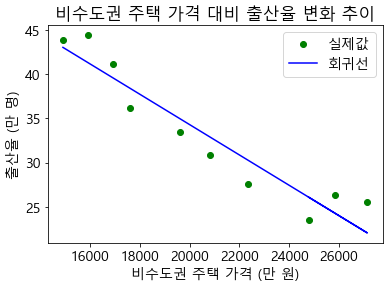

In [20]:
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

data2 = {
    'pri_house_non_metro': [14900, 15894, 16920, 17588, 19617, 20829, 22342, 25828, 27143, 24787],  # 주택 가격 (단위: 만원)
    'bir_rate': [43.9, 44.4, 41.2, 36.2, 33.4, 30.8, 27.6, 26.3, 25.5, 23.5]   # 출생율 (단위: 만명)
}

df2 = pd.DataFrame(data2)

x= df2['pri_house_non_metro']
y = df2['bir_rate']

# 상관계수, 공분산 - 두 변수 상관 정도 + p-value
print('공분산: {:.2f}'.format(np.cov(x,y)[0,1])) 
print('상관계수: {:.2f}'.format(stats.pearsonr(x,y)[0]))

# -1 < (상관계수) < 1 
# => 1에 가까울 수록 강한 양의 상관관계
# => -1에 가까울 수록 강한 음의 상관관계
print('P-value : {:.6f}'.format(stats.pearsonr(x,y)[1])) 

x2= sm.add_constant(x) # 절편 만들기 

m2 = sm.OLS(y, x2).fit()

print(m2.summary())

# 잔차의 평균
residuals = y - m2.fittedvalues

print('잔차 평균 : {}'.format(residuals.mean()))

plt.scatter(df2['pri_house_non_metro'], df2['bir_rate'], color='green', label='실제값')
plt.plot(df2['pri_house_non_metro'], m2.fittedvalues, color='blue', label='회귀선')
plt.xlabel('비수도권 주택 가격 (만 원)')
plt.ylabel('출산율 (만 명)')
plt.title('비수도권 주택 가격 대비 출산율 변화 추이')
plt.legend()
plt.show()

# 잔차의 평균은 1.2079226507921703e-14로 0에 가깝고, 
# 결정계수(R-Squared)는 0.902로 0.7보다 크기 때문에 해당 회귀식 신뢰도가 높음
# 상관계수는 -0.96 로 강한 음의 상관성을 띰 
# p-value는 0.000027 이므로 p < 0.05 이기 때문에 영가설 기각, 대립가설 채택
# 따라서, 집값이 1000만원 상승하면, 출산 정도가 약 1만 7천명씩 감소함

   pri_house   bir_rate
0      60000  19.621295
1      65000  16.137393
2      70000  12.653492
3      75000   9.169590
4      80000   5.685689


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- price
Feature names seen at fit time, yet now missing:
- pri_house_metro

  warnings.warn(message, FutureWarning)


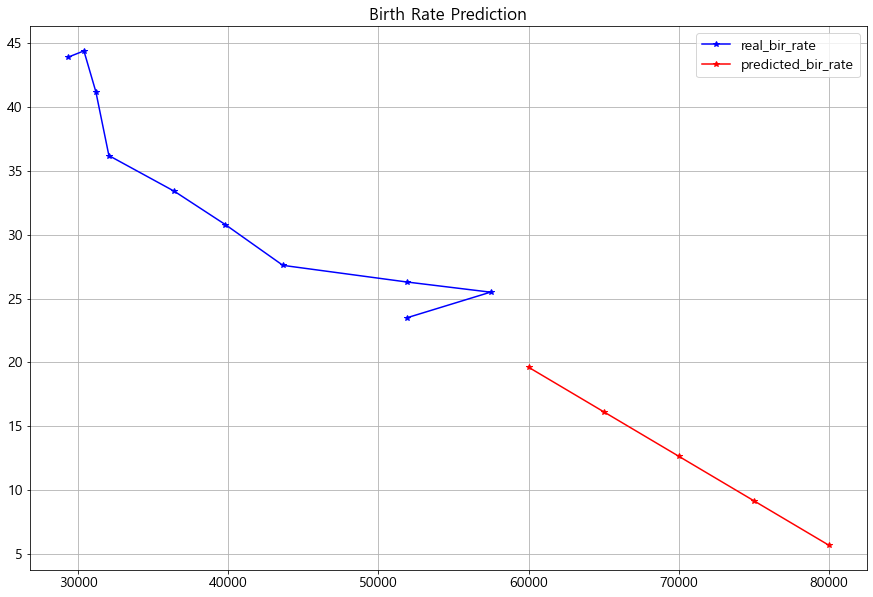

In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

data = {
    'pri_house_metro' : [29298, 30376, 31171, 32040, 36406, 39791, 43635, 51871, 57469, 51917],  # 주택 가격 (단위: 만원)
    'bir_rate' : [43.9, 44.4, 41.2, 36.2, 33.4, 30.8, 27.6, 26.3, 25.5, 23.5]   # 출생율 (단위: 만명)
}

df = pd.DataFrame(data)

x = df[['pri_house_metro']]
y = df['bir_rate']

model = LinearRegression()
model.fit(x, y) # 학습

f_price = pd.DataFrame({'price' : [60000, 65000, 70000, 75000, 80000]})

p_bir_rate = model.predict(f_price) # 예측

f_df = pd.DataFrame({'pri_house' : f_price['price'], 'bir_rate' : p_bir_rate})

print(f_df) # 예측 값을 수치로 출력

plt.figure(figsize = (15, 10))
plt.plot(df['pri_house_metro'], df['bir_rate'], marker = '*', label = 'real_bir_rate', color = 'blue')
plt.plot(f_df['pri_house'], f_df['bir_rate'], marker = '*', label = 'predicted_bir_rate', color = 'red')
plt.title('Birth Rate Prediction')
plt.grid(True)
plt.legend()
plt.show()

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- price
Feature names seen at fit time, yet now missing:
- pri_house_non_metro

  warnings.warn(message, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


   pri_house   bir_rate
0      30000  17.136431
1      35000   8.563289
2      40000  -0.009853
3      45000  -8.582994
4      50000 -17.156136


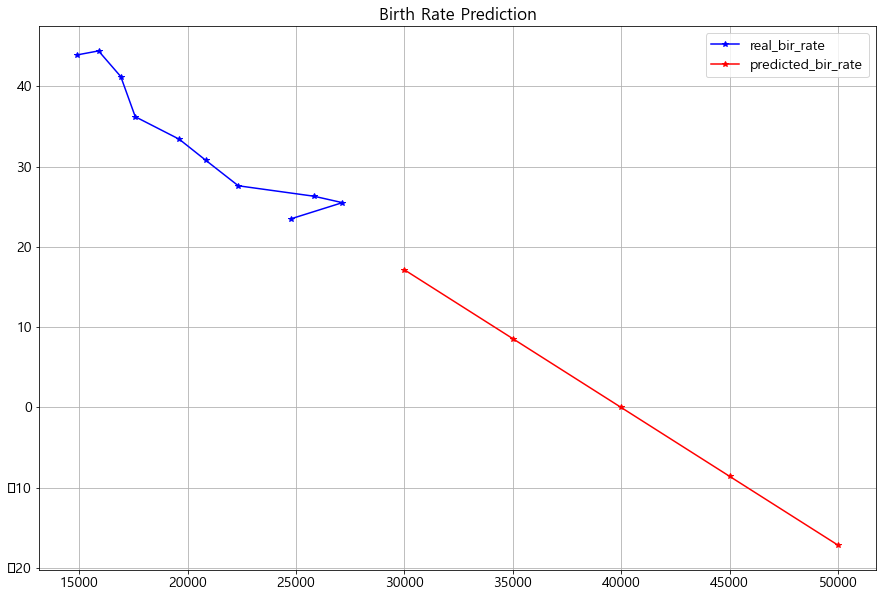

In [24]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

data = {
    'pri_house_non_metro': [14900, 15894, 16920, 17588, 19617, 20829, 22342, 25828, 27143, 24787], # 주택 가격(단위: 만원)
    'bir_rate': [43.9, 44.4, 41.2, 36.2, 33.4, 30.8, 27.6, 26.3, 25.5, 23.5] # 출생율 (단위: 만명)
}

df = pd.DataFrame(data)

x = df[['pri_house_non_metro']]
y = df['bir_rate']

model = LinearRegression()
model.fit(x, y) # 학습

f_price = pd.DataFrame({'price' : [30000, 35000, 40000, 45000, 50000]})

p_bir_rate = model.predict(f_price) # 예측

f_df = pd.DataFrame({'pri_house' : f_price['price'], 'bir_rate' : p_bir_rate})

print(f_df) # 예측 값을 수치로 출력

plt.figure(figsize = (15, 10))
plt.plot(df['pri_house_non_metro'], df['bir_rate'], marker = '*', label = 'real_bir_rate', color = 'blue')
plt.plot(f_df['pri_house'], f_df['bir_rate'], marker = '*', label = 'predicted_bir_rate', color = 'red')
plt.title('Birth Rate Prediction')
plt.grid(True)
plt.legend()
plt.show()

   year         price
0  2024  58227.133333
1  2025  61468.903030
2  2026  64710.672727
3  2027  67952.442424
4  2028  71194.212121
   year  birth_rate
0  2024   19.320000
1  2025   16.781818
2  2026   14.243636
3  2027   11.705455
4  2028    9.167273


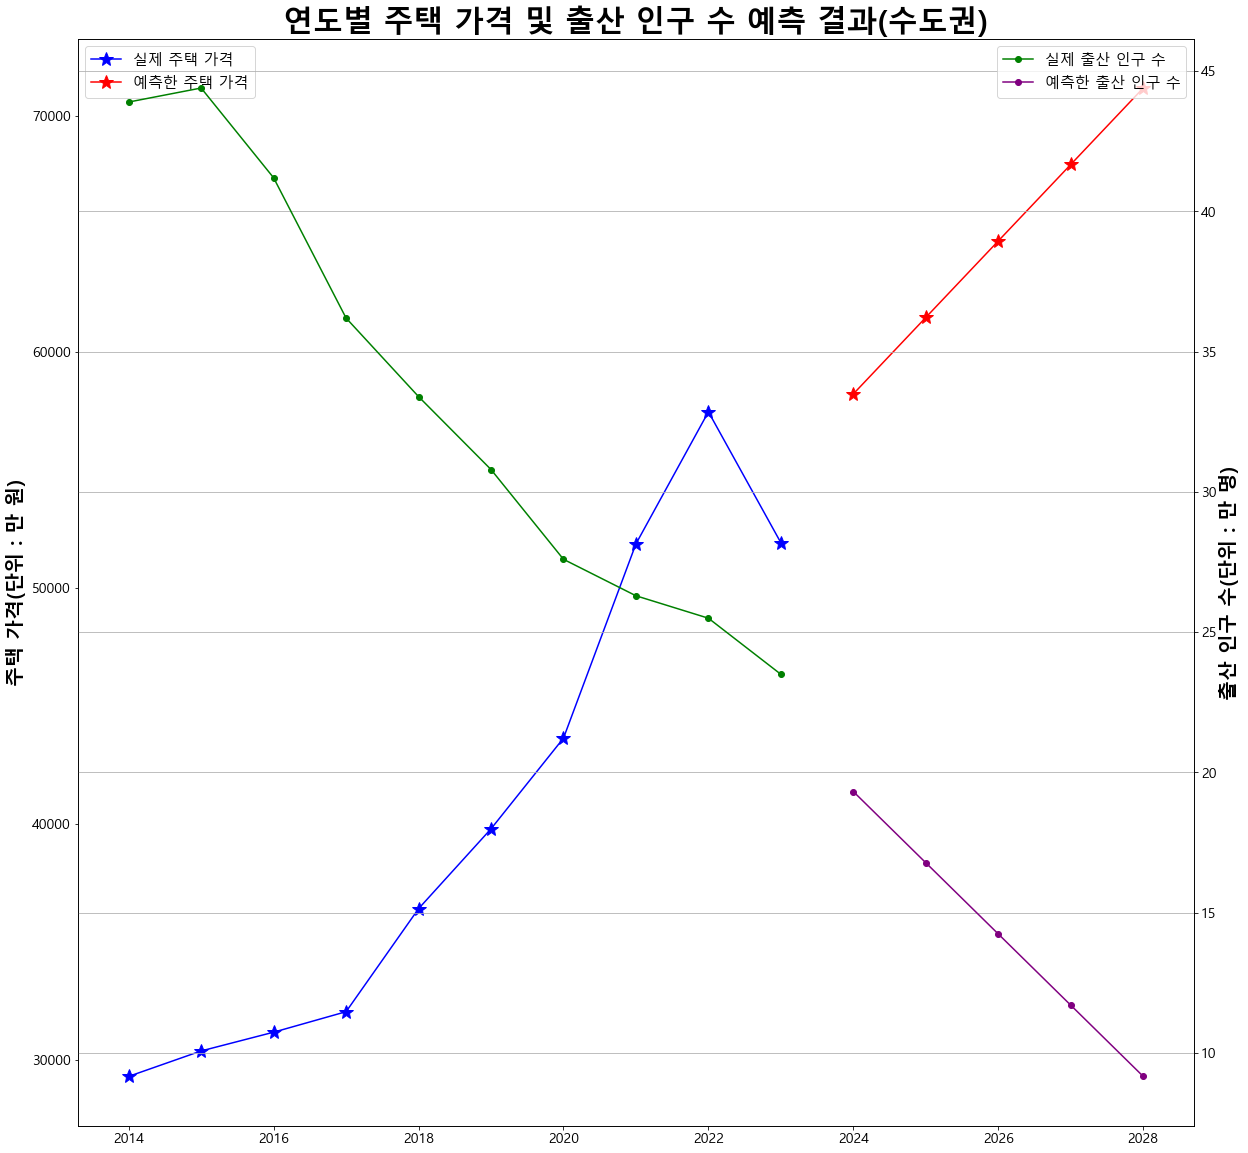

In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

data1 = {
    'year' : [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], # 연도
    'price_house_metro' : [29298, 30376, 31171, 32040, 36406, 39791, 43635, 51871, 57469, 51917] # 주택 가격(단위: 만원)
}

df1 = pd.DataFrame(data1)

x1 = df1[['year']]
y1 = df1['price_house_metro']

model1 = LinearRegression()
model1.fit(x1, y1) # 주택 가격 학습

f_year = pd.DataFrame({'year' : [2024, 2025, 2026, 2027, 2028]})
p_price = model1.predict(f_year) # 주택 가격 예측

f_df1 = pd.DataFrame({'year' : f_year['year'], 'price' : p_price})

print(f_df1)

data2 = {
    'year' : [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], # 연도
    'birth_rate': [43.9, 44.4, 41.2, 36.2, 33.4, 30.8, 27.6, 26.3, 25.5, 23.5] # 출생율 (단위: 만명)
}

df2 = pd.DataFrame(data2)

x2 = df2[['year']]
y2 = df2['birth_rate']

model2 = LinearRegression()
model2.fit(x2, y2) # 출산율 학습

p_birth_rate = model2.predict(f_year) # 출산율 예측

f_df2 = pd.DataFrame({'year' : f_year['year'], 'birth_rate' : p_birth_rate})

print(f_df2)

fig = plt.figure(figsize = (20, 20))
axes1 = fig.add_subplot(111)
axes1.plot(df1['year'], df1['price_house_metro'], marker = '*', label = '실제 주택 가격', color = 'blue', ms = 15)
axes1.plot(f_df1['year'], f_df1['price'], marker = '*', label = '예측한 주택 가격', color = 'red', ms = 15)
axes1.legend(fontsize = 15)
axes1.set_ylabel('주택 가격(단위 : 만 원)', fontsize = 20, fontweight = 'bold')

axes2 = axes1.twinx()
axes2.plot(df2['year'], df2['birth_rate'], marker = 'o', label = '실제 출산 인구 수', color = 'green')
axes2.plot(f_df2['year'], f_df2['birth_rate'], marker = 'o', label = '예측한 출산 인구 수', color = 'purple')
axes2.legend(fontsize = 15)
axes2.set_ylabel('출산 인구 수(단위 : 만 명)', fontsize = 20, fontweight = 'bold')

plt.rc('font', family = 'Malgun Gothic', size = '14') # 한글 처리
plt.title('연도별 주택 가격 및 출산 인구 수 예측 결과(수도권)', fontsize = 30, fontweight = 'bold')
plt.grid(True)
plt.savefig('연도별 주택 가격 및 전체 출산 인구 수 예측 결과(수도권).png')
plt.show()

   year         price
0  2024  28176.133333
1  2025  29556.375758
2  2026  30936.618182
3  2027  32316.860606
4  2028  33697.103030
   year  birth_rate
0  2024   19.320000
1  2025   16.781818
2  2026   14.243636
3  2027   11.705455
4  2028    9.167273


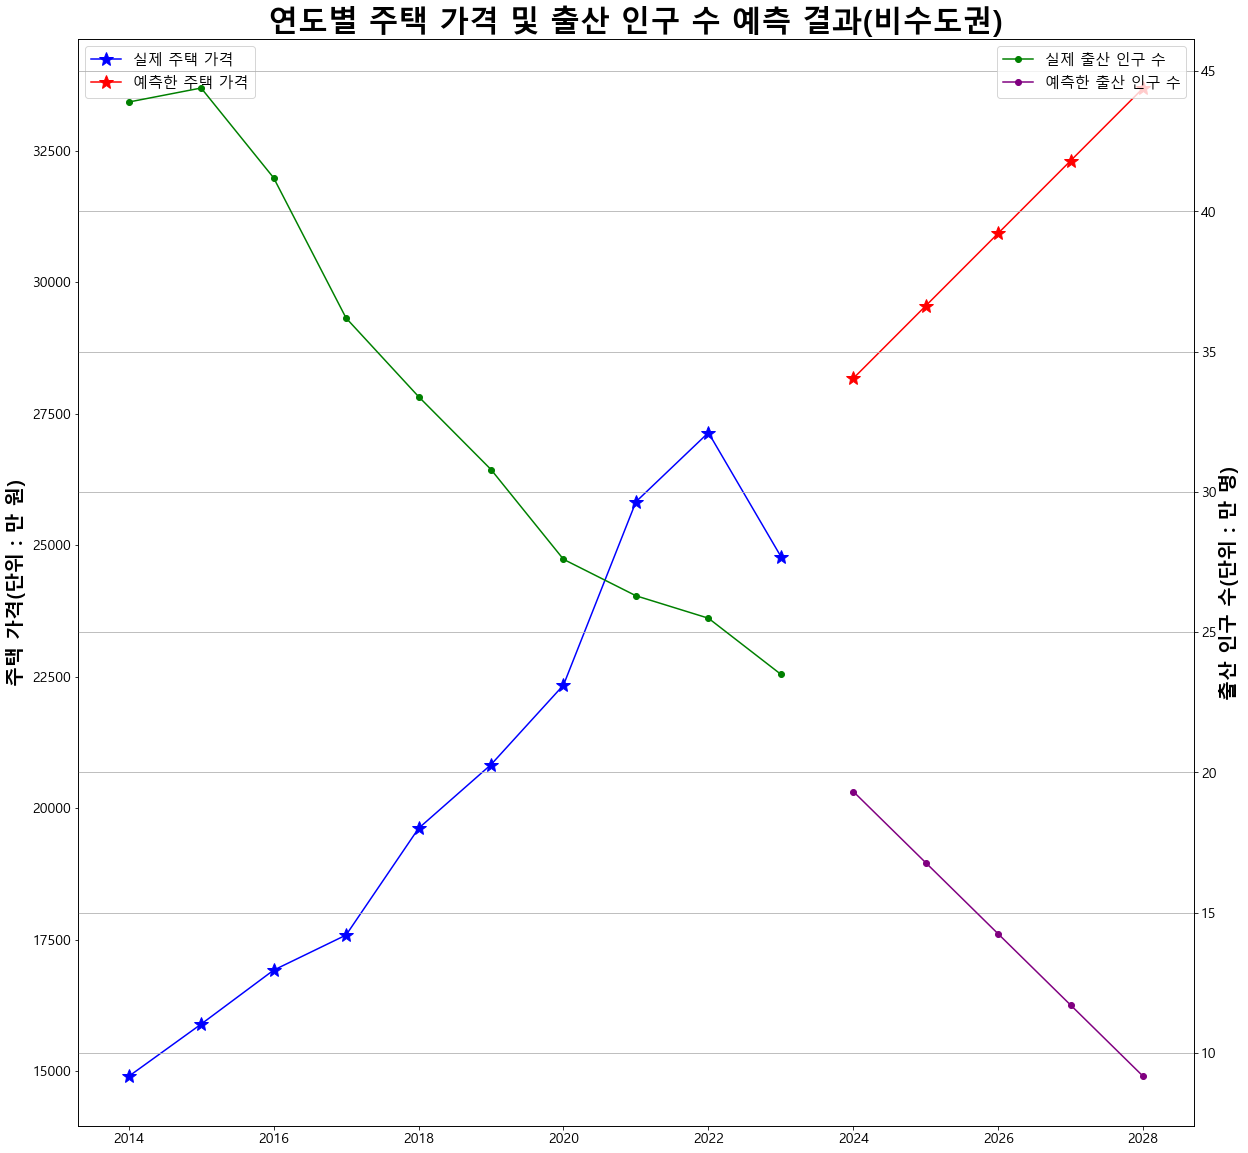

In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

data1 = {
    'year' : [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], # 연도
    'price_house_non_metro': [14900, 15894, 16920, 17588, 19617, 20829, 22342, 25828, 27143, 24787] # 주택 가격(단위: 만원)
}

df1 = pd.DataFrame(data1)

x1 = df1[['year']]
y1 = df1['price_house_non_metro']

model1 = LinearRegression()
model1.fit(x1, y1) # 주택 가격 학습

f_year = pd.DataFrame({'year' : [2024, 2025, 2026, 2027, 2028]})
p_price = model1.predict(f_year) # 주택 가격 예측

f_df1 = pd.DataFrame({'year' : f_year['year'], 'price' : p_price})

print(f_df1)

data2 = {
    'year' : [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], # 연도
    'birth_rate': [43.9, 44.4, 41.2, 36.2, 33.4, 30.8, 27.6, 26.3, 25.5, 23.5] # 출생율 (단위: 만명)
}

df2 = pd.DataFrame(data2)

x2 = df2[['year']]
y2 = df2['birth_rate']

model2 = LinearRegression()
model2.fit(x2, y2) # 출산율 학습

p_birth_rate = model2.predict(f_year) # 출산율 예측

f_df2 = pd.DataFrame({'year' : f_year['year'], 'birth_rate' : p_birth_rate})

print(f_df2)

fig = plt.figure(figsize = (20, 20))
axes1 = fig.add_subplot(111)
axes1.plot(df1['year'], df1['price_house_non_metro'], marker = '*', label = '실제 주택 가격', color = 'blue', ms = 15)
axes1.plot(f_df1['year'], f_df1['price'], marker = '*', label = '예측한 주택 가격', color = 'red', ms = 15)
axes1.legend(fontsize = 15)
axes1.set_ylabel('주택 가격(단위 : 만 원)', fontsize = 20, fontweight = 'bold')

axes2 = axes1.twinx()
axes2.plot(df2['year'], df2['birth_rate'], marker = 'o', label = '실제 출산 인구 수', color = 'green')
axes2.plot(f_df2['year'], f_df2['birth_rate'], marker = 'o', label = '예측한 출산 인구 수', color = 'purple')
axes2.legend(fontsize = 15)
axes2.set_ylabel('출산 인구 수(단위 : 만 명)', fontsize = 20, fontweight = 'bold')

plt.rc('font', family = 'Malgun Gothic', size = '14') # 한글 처리
plt.title('연도별 주택 가격 및 출산 인구 수 예측 결과(비수도권)', fontsize = 30, fontweight = 'bold')
plt.grid(True)
plt.savefig('연도별 주택 가격 및 전체 출산 인구 수 예측 결과(비수도권).png')
plt.show()

   year         price
0  2024  58227.133333
1  2025  61468.903030
2  2026  64710.672727
3  2027  67952.442424
4  2028  71194.212121
   year  birth_rate
0  2024    3.486000
1  2025    3.083636
2  2026    2.681273
3  2027    2.278909
4  2028    1.876545


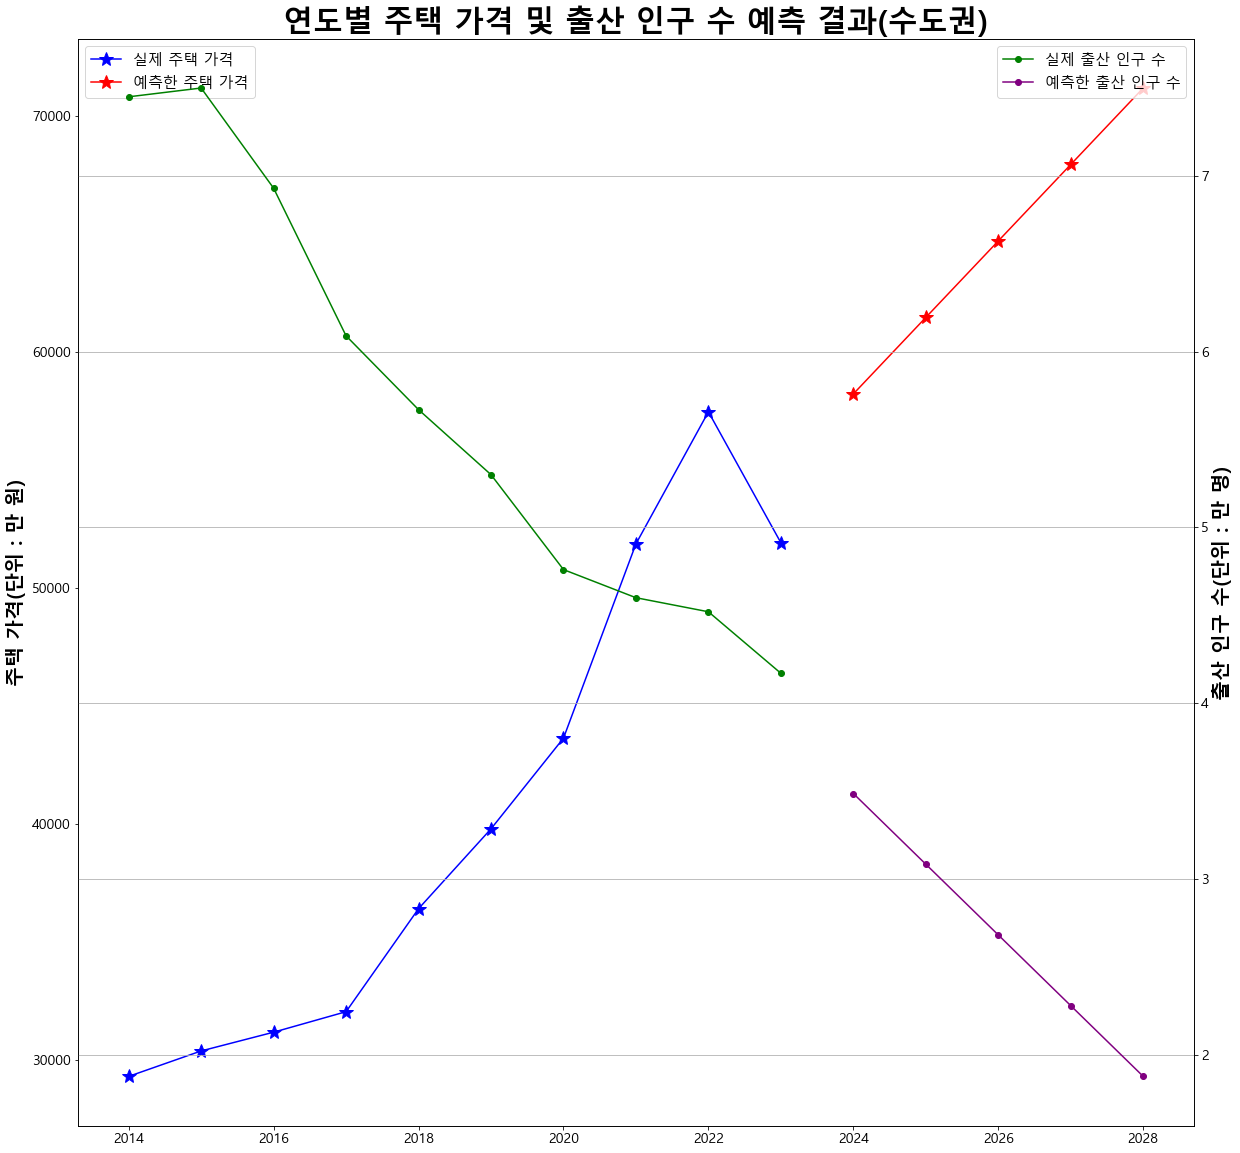

In [35]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

data1 = {
    'year' : [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], # 연도
    'price_house_metro' : [29298, 30376, 31171, 32040, 36406, 39791, 43635, 51871, 57469, 51917] # 주택 가격(단위: 만원)
}

df1 = pd.DataFrame(data1)

x1 = df1[['year']]
y1 = df1['price_house_metro']

model1 = LinearRegression()
model1.fit(x1, y1) # 주택 가격 학습

f_year = pd.DataFrame({'year' : [2024, 2025, 2026, 2027, 2028]})
p_price = model1.predict(f_year) # 주택 가격 예측

f_df1 = pd.DataFrame({'year' : f_year['year'], 'price' : p_price})

print(f_df1)

data2 = {
    'year' : [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], # 연도
    'birth_rate': [7.45, 7.5, 6.93, 6.09, 5.67, 5.3, 4.76, 4.6, 4.52, 4.17] # 출생율 (단위: 만명)
}

df2 = pd.DataFrame(data2)

x2 = df2[['year']]
y2 = df2['birth_rate']

model2 = LinearRegression()
model2.fit(x2, y2) # 출산율 학습

p_birth_rate = model2.predict(f_year) # 출산율 예측

f_df2 = pd.DataFrame({'year' : f_year['year'], 'birth_rate' : p_birth_rate})

print(f_df2)

fig = plt.figure(figsize = (20, 20))
axes1 = fig.add_subplot(111)
axes1.plot(df1['year'], df1['price_house_metro'], marker = '*', label = '실제 주택 가격', color = 'blue', ms = 15)
axes1.plot(f_df1['year'], f_df1['price'], marker = '*', label = '예측한 주택 가격', color = 'red', ms = 15)
axes1.legend(fontsize = 15)
axes1.set_ylabel('주택 가격(단위 : 만 원)', fontsize = 20, fontweight = 'bold')

axes2 = axes1.twinx()
axes2.plot(df2['year'], df2['birth_rate'], marker = 'o', label = '실제 출산 인구 수', color = 'green')
axes2.plot(f_df2['year'], f_df2['birth_rate'], marker = 'o', label = '예측한 출산 인구 수', color = 'purple')
axes2.legend(fontsize = 15)
axes2.set_ylabel('출산 인구 수(단위 : 만 명)', fontsize = 20, fontweight = 'bold')

plt.rc('font', family = 'Malgun Gothic', size = '14') # 한글 처리
plt.title('연도별 주택 가격 및 출산 인구 수 예측 결과(수도권)', fontsize = 30, fontweight = 'bold')
plt.grid(True)
plt.savefig('연도별 주택 가격 및 출산 인구 수 예측 결과(수도권).png')
plt.show()

   year         price
0  2024  28176.133333
1  2025  29556.375758
2  2026  30936.618182
3  2027  32316.860606
4  2028  33697.103030
   year  birth_rate
0  2024    0.613333
1  2025    0.517030
2  2026    0.420727
3  2027    0.324424
4  2028    0.228121


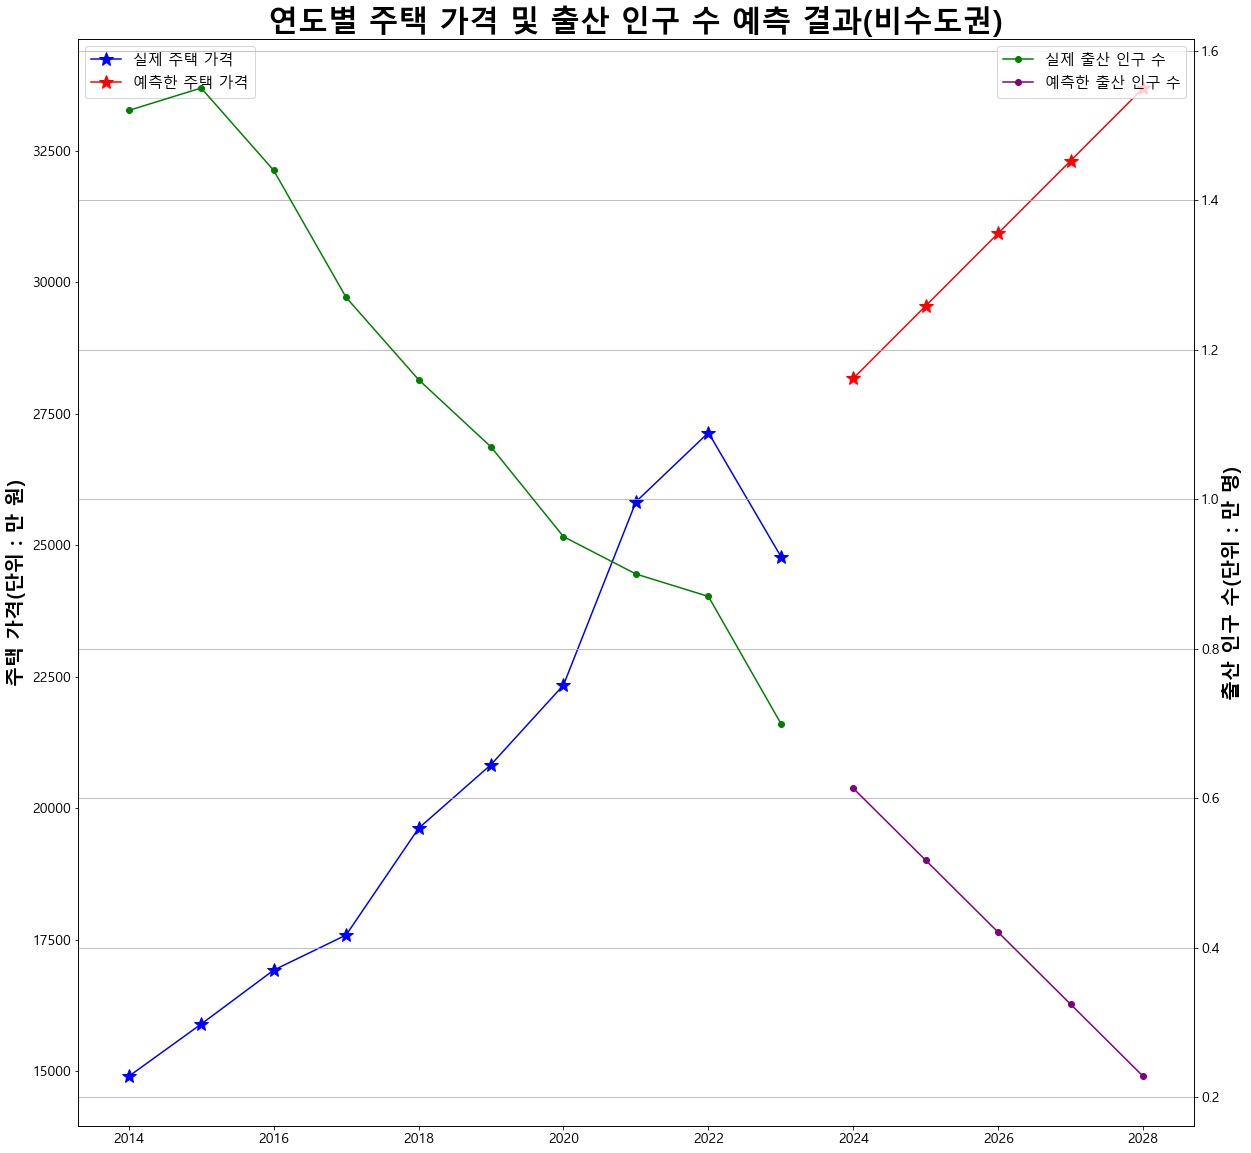

In [36]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

data1 = {
    'year' : [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], # 연도
    'price_house_non_metro': [14900, 15894, 16920, 17588, 19617, 20829, 22342, 25828, 27143, 24787] # 주택 가격(단위: 만원)
}

df1 = pd.DataFrame(data1)

x1 = df1[['year']]
y1 = df1['price_house_non_metro']

model1 = LinearRegression()
model1.fit(x1, y1) # 주택 가격 학습

f_year = pd.DataFrame({'year' : [2024, 2025, 2026, 2027, 2028]})
p_price = model1.predict(f_year) # 주택 가격 예측

f_df1 = pd.DataFrame({'year' : f_year['year'], 'price' : p_price})

print(f_df1)

data2 = {
    'year' : [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], # 연도
    'birth_rate': [1.52, 1.55, 1.44, 1.27, 1.16, 1.07, 0.95, 0.9, 0.87, 0.7] # 출생율 (단위: 만명)
}

df2 = pd.DataFrame(data2)

x2 = df2[['year']]
y2 = df2['birth_rate']

model2 = LinearRegression()
model2.fit(x2, y2) # 출산율 학습

p_birth_rate = model2.predict(f_year) # 출산율 예측

f_df2 = pd.DataFrame({'year' : f_year['year'], 'birth_rate' : p_birth_rate})

print(f_df2)

fig = plt.figure(figsize = (20, 20))
axes1 = fig.add_subplot(111)
axes1.plot(df1['year'], df1['price_house_non_metro'], marker = '*', label = '실제 주택 가격', color = 'blue', ms = 15)
axes1.plot(f_df1['year'], f_df1['price'], marker = '*', label = '예측한 주택 가격', color = 'red', ms = 15)
axes1.legend(fontsize = 15)
axes1.set_ylabel('주택 가격(단위 : 만 원)', fontsize = 20, fontweight = 'bold')

axes2 = axes1.twinx()
axes2.plot(df2['year'], df2['birth_rate'], marker = 'o', label = '실제 출산 인구 수', color = 'green')
axes2.plot(f_df2['year'], f_df2['birth_rate'], marker = 'o', label = '예측한 출산 인구 수', color = 'purple')
axes2.legend(fontsize = 15)
axes2.set_ylabel('출산 인구 수(단위 : 만 명)', fontsize = 20, fontweight = 'bold')

plt.rc('font', family = 'Malgun Gothic', size = '14') # 한글 처리
plt.title('연도별 주택 가격 및 출산 인구 수 예측 결과(비수도권)', fontsize = 30, fontweight = 'bold')
plt.grid(True)
plt.savefig('연도별 주택 가격 및 출산 인구 수 예측 결과(비수도권).png')
plt.show()